IRIS CLASSIFICATION  

Module Importing 

In [1]:
 import numpy as np
 import pandas as pd
 import tensorflow as tf
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler, LabelEncoder
 from sklearn.datasets import load_iris
 from sklearn.metrics import accuracy_score, confusion_matrix
 import seaborn as sns

Data Importing 

In [2]:
df = pd.read_csv("Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# The LabelEncoder class in scikit-learn is used for encoding categorical labels as numeric values. This is particularly useful when dealing with machine learning algorithms that require input to be numeric, such as logistic regression, support vector machines, and neural networks.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
label_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:

X = df.drop(columns = ['Id','Species'])
Y = df['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:

Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state=42)
print(X_train.shape, y_train.shape)

(120, 4) (120,)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Structuring 

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # Input layer with 4 features
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes
])

In [13]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

Model Computing 

In [14]:
model.fit(X_train, y_train, epochs = 50, batch_size = 16, verbose = 1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0922 - loss: 1.1500 
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2309 - loss: 1.0808 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3001 - loss: 1.0435 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3650 - loss: 1.0132 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4832 - loss: 0.9563 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4756 - loss: 0.9565 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4778 - loss: 0.9337 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5034 - loss: 0.8890 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5961 - loss: 0.8377 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6211 - loss: 0.8268 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5847 - loss: 0.8299 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6548 - loss: 0.7869 


In [17]:

pred = model.predict(X_test)
print(pred[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
[[0.08054653 0.58148503 0.33796838]
 [0.89524263 0.01601552 0.08874176]
 [0.00224795 0.04575391 0.9519982 ]
 [0.12114758 0.4517777  0.42707476]
 [0.03840709 0.4772931  0.48429984]]


In [18]:
pred = np.argmax(pred , axis = 1)
print(pred)

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [19]:
print(accuracy_score(y_test, pred))

0.9333333333333333


In [21]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


In [ ]:
Model Visualization 

Axes(0.125,0.11;0.62x0.77)


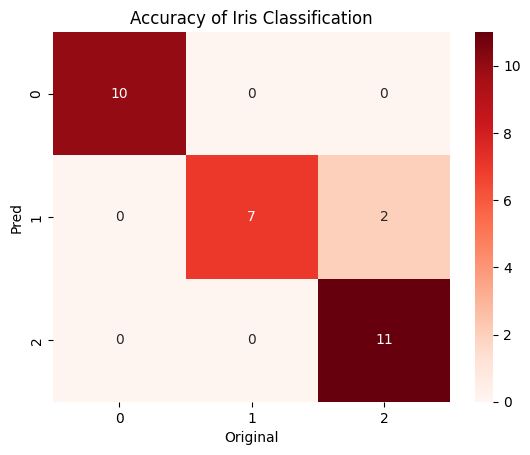

In [22]:
h_map = sns.heatmap(cm, annot = True ,fmt ="d" ,cmap = 'Reds')
h_map.set_title("Accuracy of Iris Classification")
h_map.set_xlabel("Original")
h_map.set_ylabel("Pred")
print(h_map)

Testing with Custom Input 

In [23]:
import joblib
# joblib.dump(model, "Classification.joblib")
model.save("Classification.keras")